## Quick and dirty compare

Sometimes all your need is a simple comparison of two time series. The `fmskill.compare()` method does just that.

In [51]:
import mikeio 
import fmskill

### The model
Can be either a dfs0 or a DataFrame. 

In [52]:
fn_mod = '../tests/testdata/SW/ts_storm_4.dfs0'
df_mod = mikeio.read(fn_mod, items=0).to_dataframe()  # select 1 item

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. 

In [53]:
fn_obs = '../tests/testdata/SW/eur_Hm0.dfs0'

### compare()

The compare() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

If the observation or model has more than 1 item, the `obs_item` or `mod_item` can be given to specify the relevant item. 

In [54]:
c = fmskill.compare(fn_obs, df_mod)   # both with 1 item only
#c = fmskill.compare(fn_obs, fn_mod, mod_item=0) # need to specify item in model file

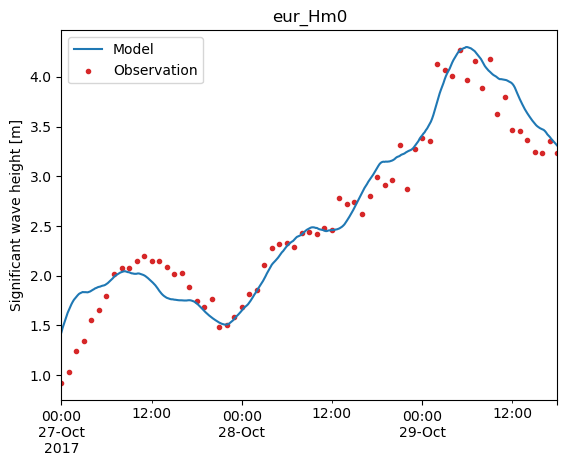

In [55]:
c.plot_timeseries();

In [56]:
c.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.085898,0.929767


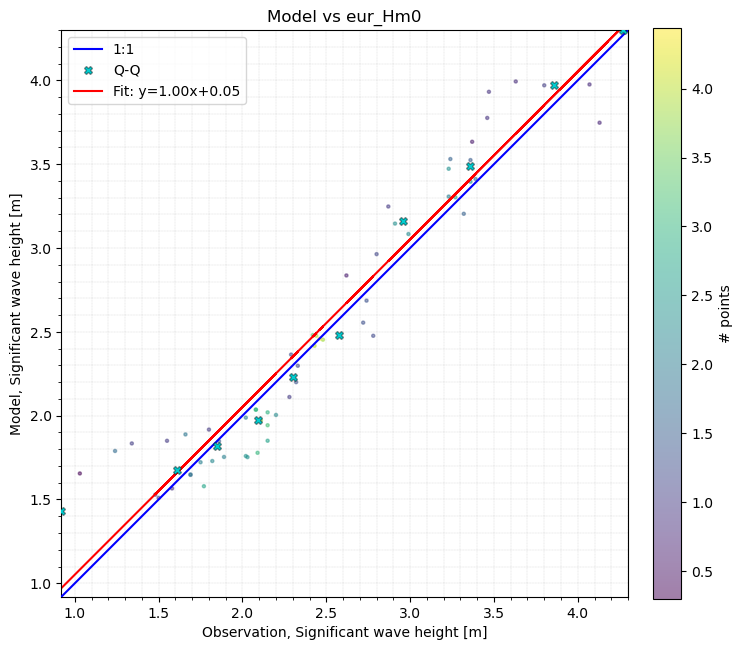

In [57]:
c.scatter()

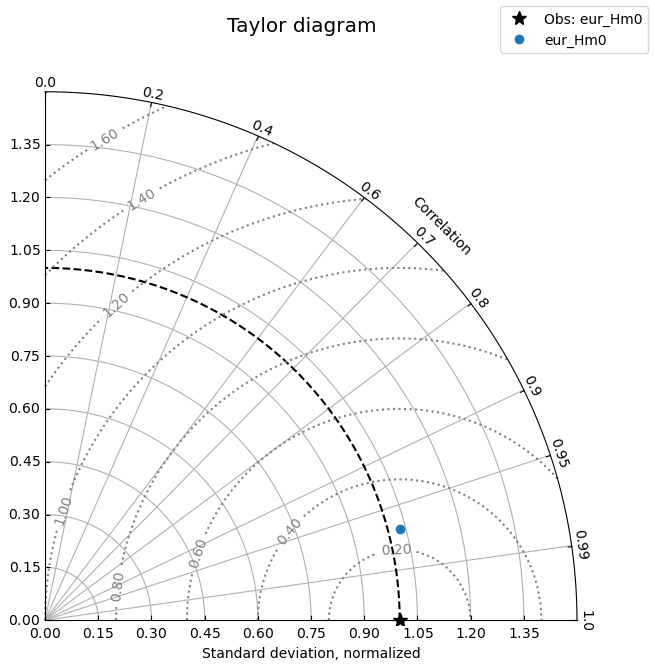

In [58]:
c.taylor(normalize_std=True)

## Model result with nan

<AxesSubplot: >

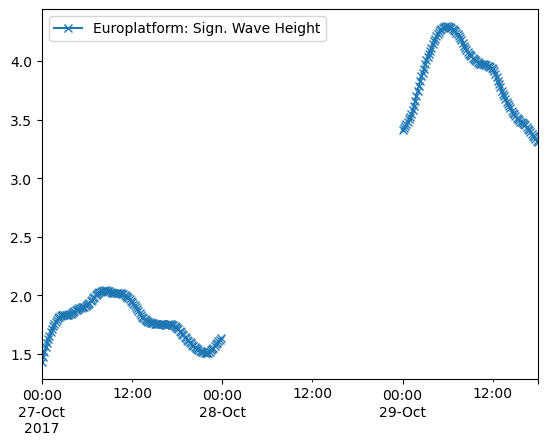

In [59]:
import numpy as np
df_mod_nan = df_mod.copy()
df_mod_nan.loc['2017-10-28'] = np.nan
df_mod_nan.plot(marker='x')

<AxesSubplot: title={'center': 'eur_Hm0'}, ylabel='Significant wave height [m]'>

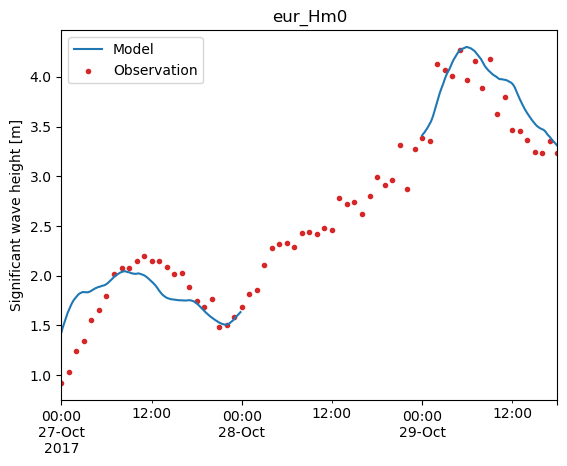

In [60]:
c2 = fmskill.compare(fn_obs, df_mod_nan)
c2.plot_timeseries()

## Non-equidistant model result

<AxesSubplot: >

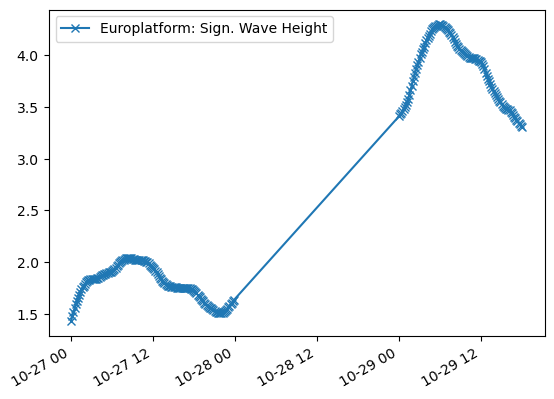

In [61]:
import pandas as pd
df_mod_gap = pd.concat([df_mod.loc['2017-10-27'], df_mod.loc['2017-10-29']])
df_mod_gap.plot(marker='x')

<AxesSubplot: title={'center': 'eur_Hm0'}, ylabel='Significant wave height [m]'>

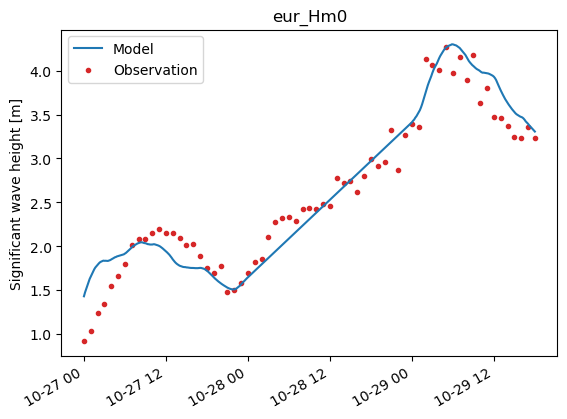

In [62]:
c3 = fmskill.compare(fn_obs, df_mod_gap)
c3.plot_timeseries()

ToDo: Do not interpolate model across gap.